In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.io import sql
from sqlalchemy import create_engine
import csv
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
tqdm.pandas()

/Users/max/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
db_user = 'postgres'
db_password = ''
db_host = 'localhost'
db_port = 5432
database = 'climbing'

conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
connection = create_engine(conn_str)

In [4]:
df_crags = pd.read_sql('select * from crags',connection,index_col='index')
df_crags['climb_list'] = [eval(flat) for flat in df_crags['climbs_flat']]
df_crags = df_crags.drop('climbs_flat',axis=1)
df_crags

,url,cragname,climbs,rocktype,altitude,faces,lat,long,climb_list
index,,,,,,,,,
4,https://www.ukclimbing.com/logbook/crag.php?id=4,Dinas Cromlech,79,Rhyolite,500.0,S,53.0917,-4.0489,"[(3166, 0), (3167, 0), (3168, 3), (3169, 1), (..."
5,https://www.ukclimbing.com/logbook/crag.php?id=5,Bus Stop Quarry,115,Slate,450.0,None,53.1294,-4.1058,"[(141016, 1), (136481, 1), (134391, 1), (1309,..."
6,https://www.ukclimbing.com/logbook/crag.php?id=6,Craig Pant Ifan (Tremadog),176,Dolerite,NaN,S,52.9436,-4.1311,"[(152703, 0), (100182, 1), (2561, 2), (2562, 2..."
7,https://www.ukclimbing.com/logbook/crag.php?id=7,St. Govan's Head,151,Limestone,12.0,SW,51.5977,-4.9277,"[(401447, 0), (138693, 1), (58187, 1), (150671..."
8,https://www.ukclimbing.com/logbook/crag.php?id=8,Carreg-y-Barcud Area,128,Sandstone (hard),13.0,S,51.8719,-5.2350,"[(503566, 0), (503567, 0), (503568, 0), (50356..."
...,...,...,...,...,...,...,...,...,...
27429,https://www.ukclimbing.com/logbook/crag.php?id...,Gap Bon ami boulders,0,UNKNOWN,NaN,None,48.8067,-64.2198,[]
27430,https://www.ukclimbing.com/logbook/crag.php?id...,Metal Expert,8,UNKNOWN,NaN,None,45.5454,25.5181,"[(560519, 3), (560520, 3), (560521, 0), (56052..."
27431,https://www.ukclimbing.com/logbook/crag.php?id...,Las Palomas,3,UNKNOWN,NaN,None,28.1159,-16.5589,"[(560451, 2), (560452, 2), (560453, 2)]"


In [5]:
df_climbs = pd.read_sql('select * from climbs',connection,index_col='index')
df_climbs['logs'] = [eval(flat) for flat in df_climbs['logs_flat']]
df_climbs = df_climbs.drop('logs_flat',axis=1)
df_climbs

,id,url,climbname,rating,grade,crag_id,desc,num_comments,type,comments_flat,logs
index,,,,,,,,,,,
3166,3166,https://www.ukclimbing.com/logbook/c.php?i=3166,Millwood's Wall,0,S 4a,4,,0,trad,' ',{}
3167,3167,https://www.ukclimbing.com/logbook/c.php?i=3167,Vanishing Point,0,E1 5b,4,,2,trad,' ',"{'187067': '', '63530': ''}"
3168,3168,https://www.ukclimbing.com/logbook/c.php?i=3168,The Thing,3,E2 5c,4,,124,trad,""" Joe led this in one pitch, taking the direc...","{'253245': '', '206609': 'Joe led this in one ..."
3169,3169,https://www.ukclimbing.com/logbook/c.php?i=3169,Rootorooni,1,E3 5c,4,,0,trad,' ',{}
3170,3170,https://www.ukclimbing.com/logbook/c.php?i=3170,Cobweb Crack,2,VS 5a,4,,181,trad,' Note that the description in the CC Llanb...,"{'185136': '', '197782': '', '6106': '', '2410..."
...,...,...,...,...,...,...,...,...,...,...,...
560510,560510,https://www.ukclimbing.com/logbook/c.php?i=560510,El chivo loco,0,6b,27432,,0,lead,' ',{}
560511,560511,https://www.ukclimbing.com/logbook/c.php?i=560511,Victorking,0,6b+,27432,,0,lead,' ',{}
560512,560512,https://www.ukclimbing.com/logbook/c.php?i=560512,Puto Maldonado,0,6c+,27432,,0,lead,' ',{}


In [6]:
df_users = pd.read_sql('select * from users',connection,index_col='index')
df_users['climbs'] = [eval(flat) for flat in df_users['climbs_flat']]
df_users = df_users.drop('climbs_flat',axis=1)
df_users

,id,logbook_url,profile_url,username,num_climbs,climbs
index,,,,,,
100002,100002,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Stephanelericolais,3,"[42012, 18853, 147314]"
10002,10002,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Piers Harley,325,"[8359, 10726, 10731, 10732, 10735, 10744, 1077..."
100025,100025,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,george5699,15,"[31435, 33329, 40976, 42231, 86139, 35261, 352..."
100031,100031,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Tak,16,"[10917, 10941, 10969, 10971, 10328, 10342, 103..."
100045,100045,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,smeaton,46,"[10729, 10731, 10735, 10814, 10816, 10837, 108..."
...,...,...,...,...,...,...
99962,99962,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,spilla,19,"[10370, 14060, 14061, 51492, 14062, 14063, 140..."
99967,99967,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Andrewbirkett,68,"[33152, 33154, 33286, 35960, 33289, 104598, 37..."
99978,99978,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Jamie Nobbs,74,"[8349, 8351, 8354, 4662, 4684, 34668, 4694, 47..."


In [7]:
uk_crags = df_crags[(df_crags['lat']>50)&(df_crags['long']>-8.2)&(df_crags['lat']<58.9)&(df_crags['long']<2.1)].index

/Users/max/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


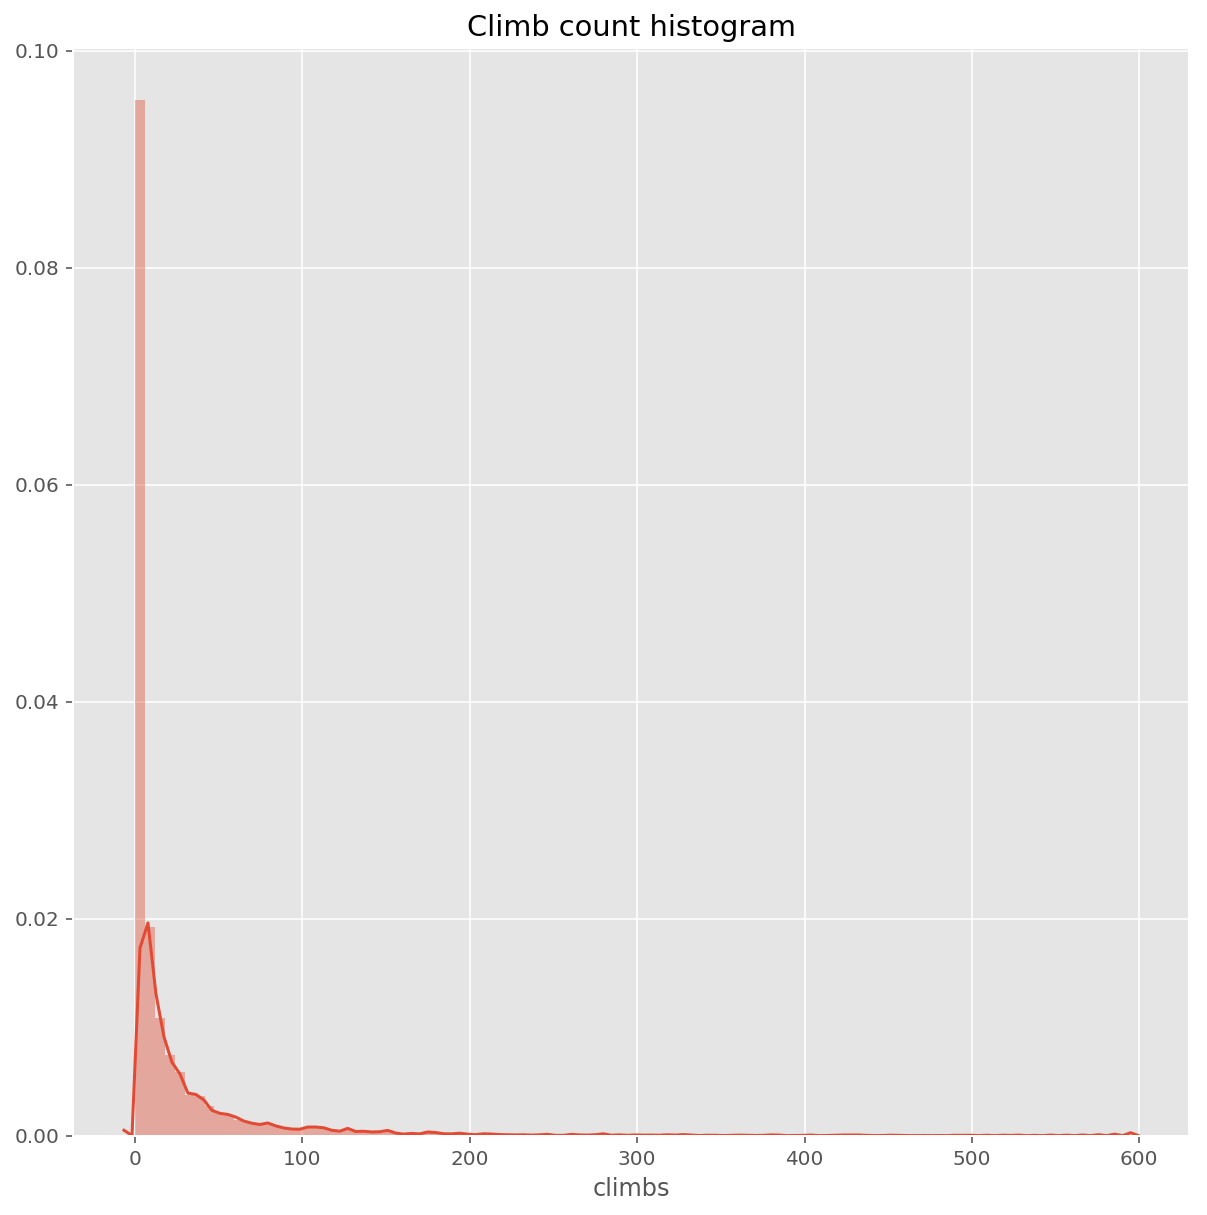

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
to_plot = df_crags.loc[uk_crags][df_crags['climbs']<600].climbs
sns.distplot(to_plot,bins=100)
ax.set_title('Climb count histogram')
fig.savefig('num_climbs_plot.png')

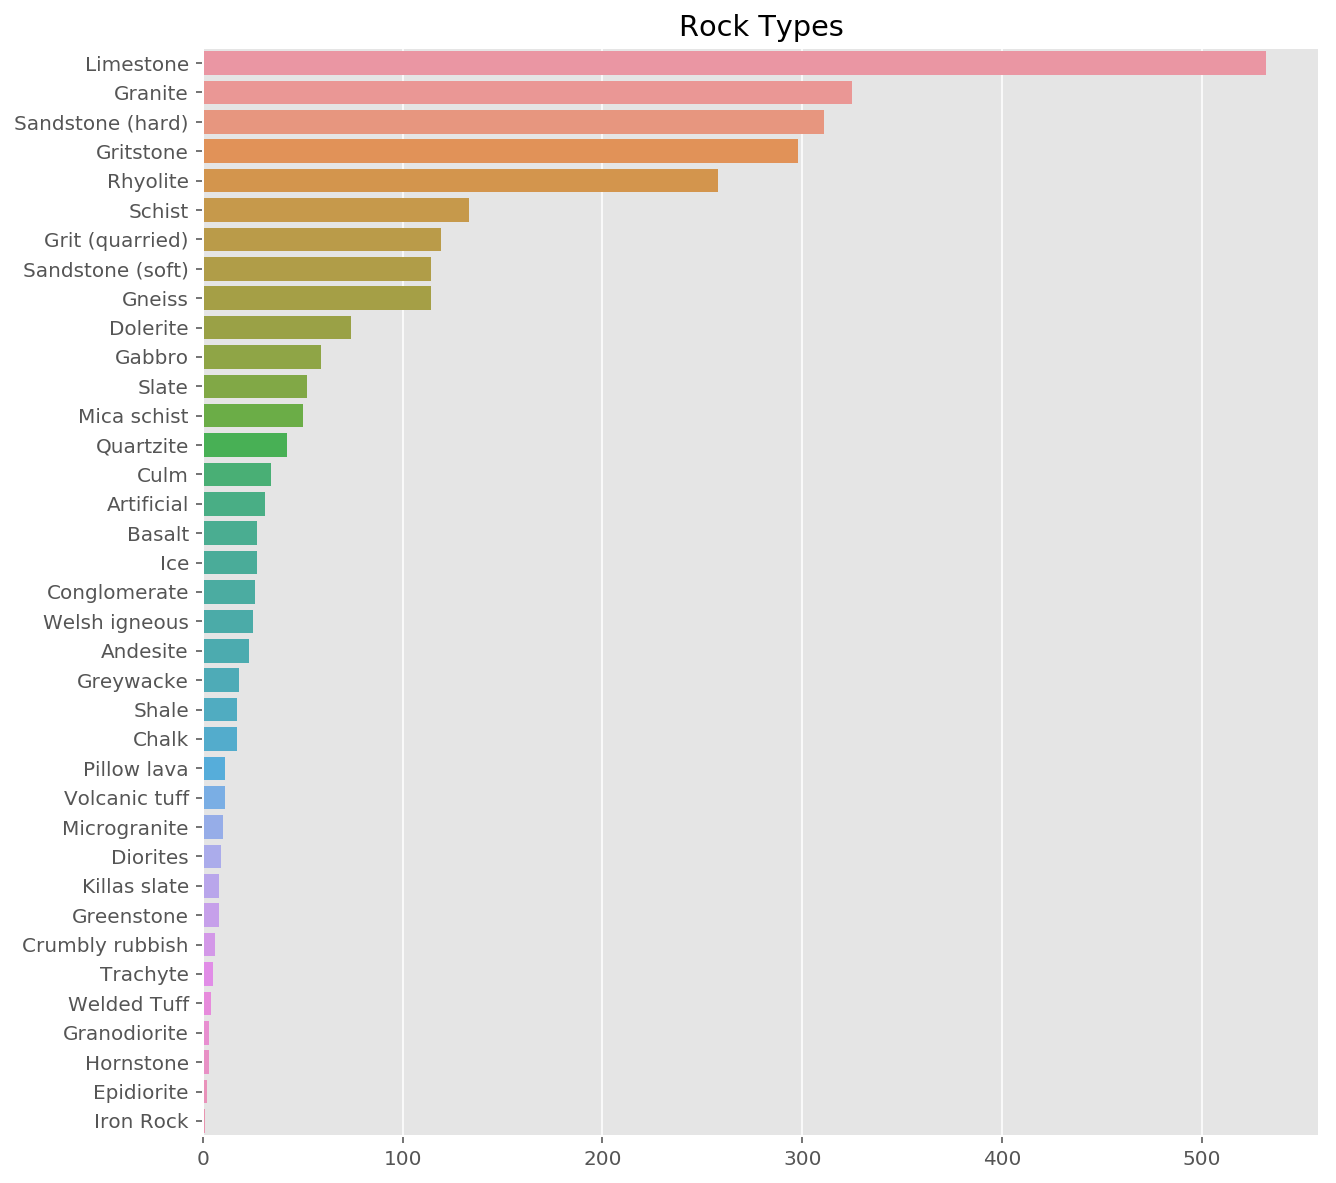

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
to_plot = df_crags.loc[uk_crags].rocktype.value_counts().drop('UNKNOWN')
sns.barplot(y=to_plot.index,x=to_plot.values,orient='h')
ax.set_title('Rock Types')
fig.savefig('rock_type_plot.png')

In [10]:
df_climbs['in_uk'] = df_climbs.crag_id.map(lambda x : x in uk_crags)

In [11]:
df_climbs_uk = df_climbs[df_climbs['in_uk']]

In [12]:
df_climbs_uk

,id,url,climbname,rating,grade,crag_id,desc,num_comments,type,comments_flat,logs,in_uk
index,,,,,,,,,,,,
3166,3166,https://www.ukclimbing.com/logbook/c.php?i=3166,Millwood's Wall,0,S 4a,4,,0,trad,' ',{},True
3167,3167,https://www.ukclimbing.com/logbook/c.php?i=3167,Vanishing Point,0,E1 5b,4,,2,trad,' ',"{'187067': '', '63530': ''}",True
3168,3168,https://www.ukclimbing.com/logbook/c.php?i=3168,The Thing,3,E2 5c,4,,124,trad,""" Joe led this in one pitch, taking the direc...","{'253245': '', '206609': 'Joe led this in one ...",True
3169,3169,https://www.ukclimbing.com/logbook/c.php?i=3169,Rootorooni,1,E3 5c,4,,0,trad,' ',{},True
3170,3170,https://www.ukclimbing.com/logbook/c.php?i=3170,Cobweb Crack,2,VS 5a,4,,181,trad,' Note that the description in the CC Llanb...,"{'185136': '', '197782': '', '6106': '', '2410...",True
...,...,...,...,...,...,...,...,...,...,...,...,...
559493,559493,https://www.ukclimbing.com/logbook/c.php?i=559493,Layback Right Arete RH,0,f6C+,27396,Layback the right arete on the RH side - no ho...,1,boulder,'Layback the right arete on the RH side - no h...,{},True
559503,559503,https://www.ukclimbing.com/logbook/c.php?i=559503,Right Arete RH and Holds,0,f6B+,27396,The right arete using holds on the wall\r\n ...,1,boulder,'The right arete using holds on the wall\r\n ...,{},True
560150,560150,https://www.ukclimbing.com/logbook/c.php?i=560150,The North Face,3,XS,27418,The XS is for Extremely Silly. Best to find yo...,3,other,'The XS is for Extremely Silly. Best to find y...,{'57759': 'Failed to finish this due to route ...,True


In [13]:
df_climbs_uk=df_climbs_uk.set_value(0, 'type', 'other')
df_climbs_uk=df_climbs_uk.set_value(0, 'num_comments', '0')

/Users/max/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/Users/max/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2909: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value
/Users/max/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [14]:
df_climbs_uk.type.value_counts()

trad       90325
boulder    56756
lead       16513
other      15061
Name: type, dtype: int64

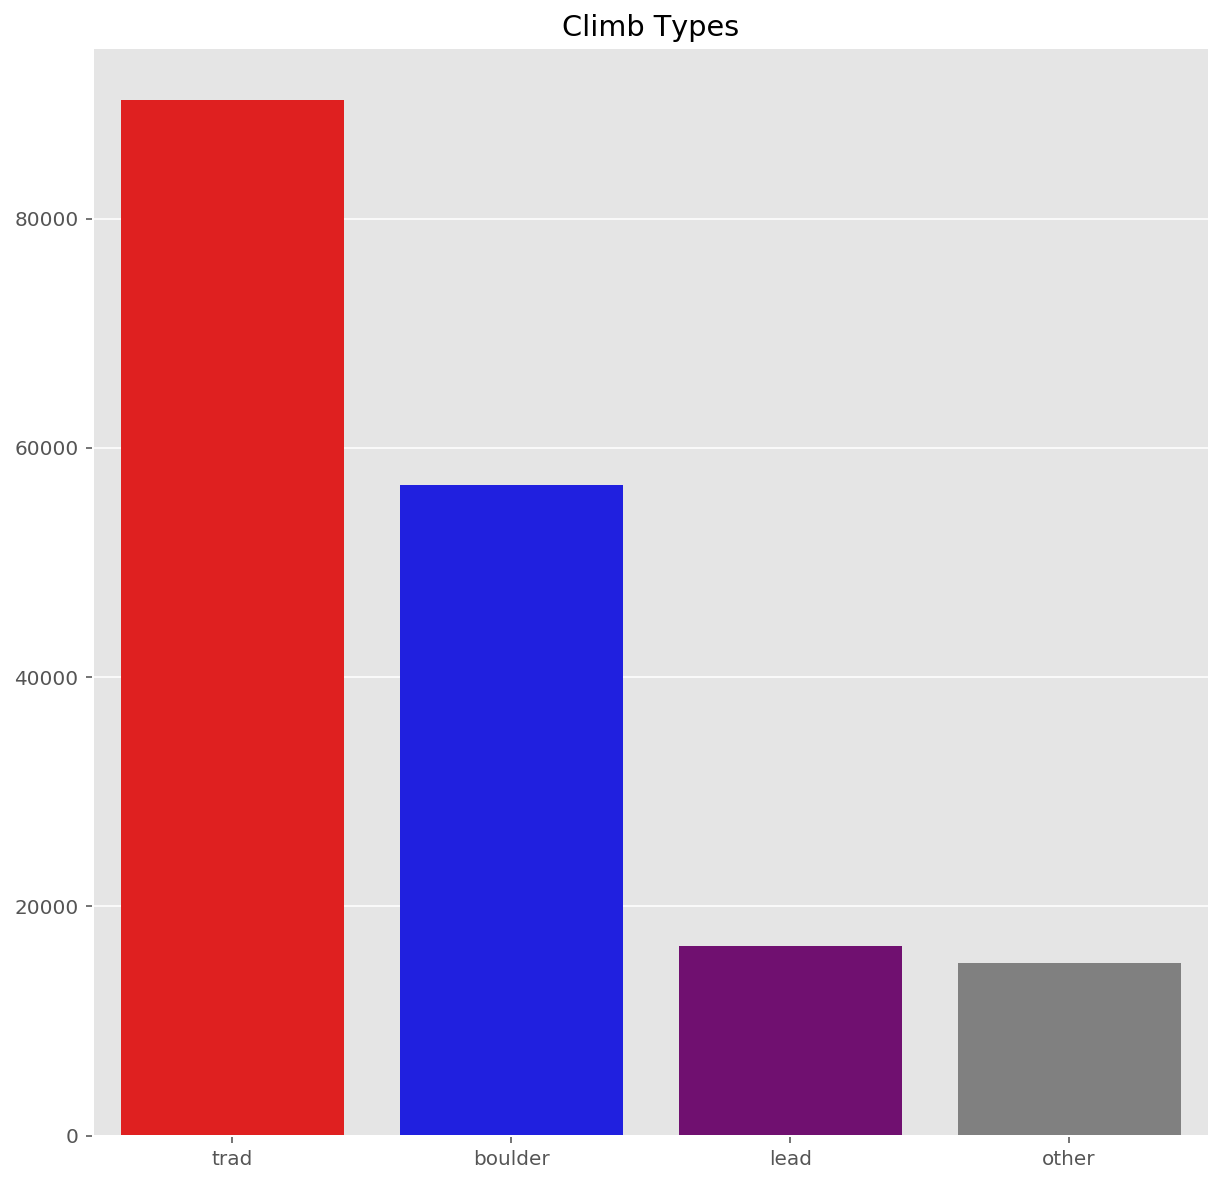

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
to_plot = df_climbs_uk.type.value_counts()
sns.barplot(x=to_plot.index,y=to_plot.values,palette=['red','blue','purple','grey'],orient='v')
ax.set_title('Climb Types')
fig.savefig('climb_type_plot.png')

In [16]:
df_climbs_uk['num_comments']

index
3166        0.0
3167        2.0
3168      124.0
3169        0.0
3170      181.0
          ...  
559503      1.0
560150      3.0
560151      2.0
560218      1.0
0           0.0
Name: num_comments, Length: 178655, dtype: float64

In [17]:
df_climbs_uk['num_comments']=df_climbs_uk.num_comments.astype(int)

In [18]:
df_climbs_uk.groupby('type').sum()

,rating,crag_id,num_comments
type,,,
boulder,37267.0,498843140.0,735724
lead,15220.0,82862855.0,670564
other,8576.0,123337908.0,341261
trad,58784.0,390712095.0,2632811


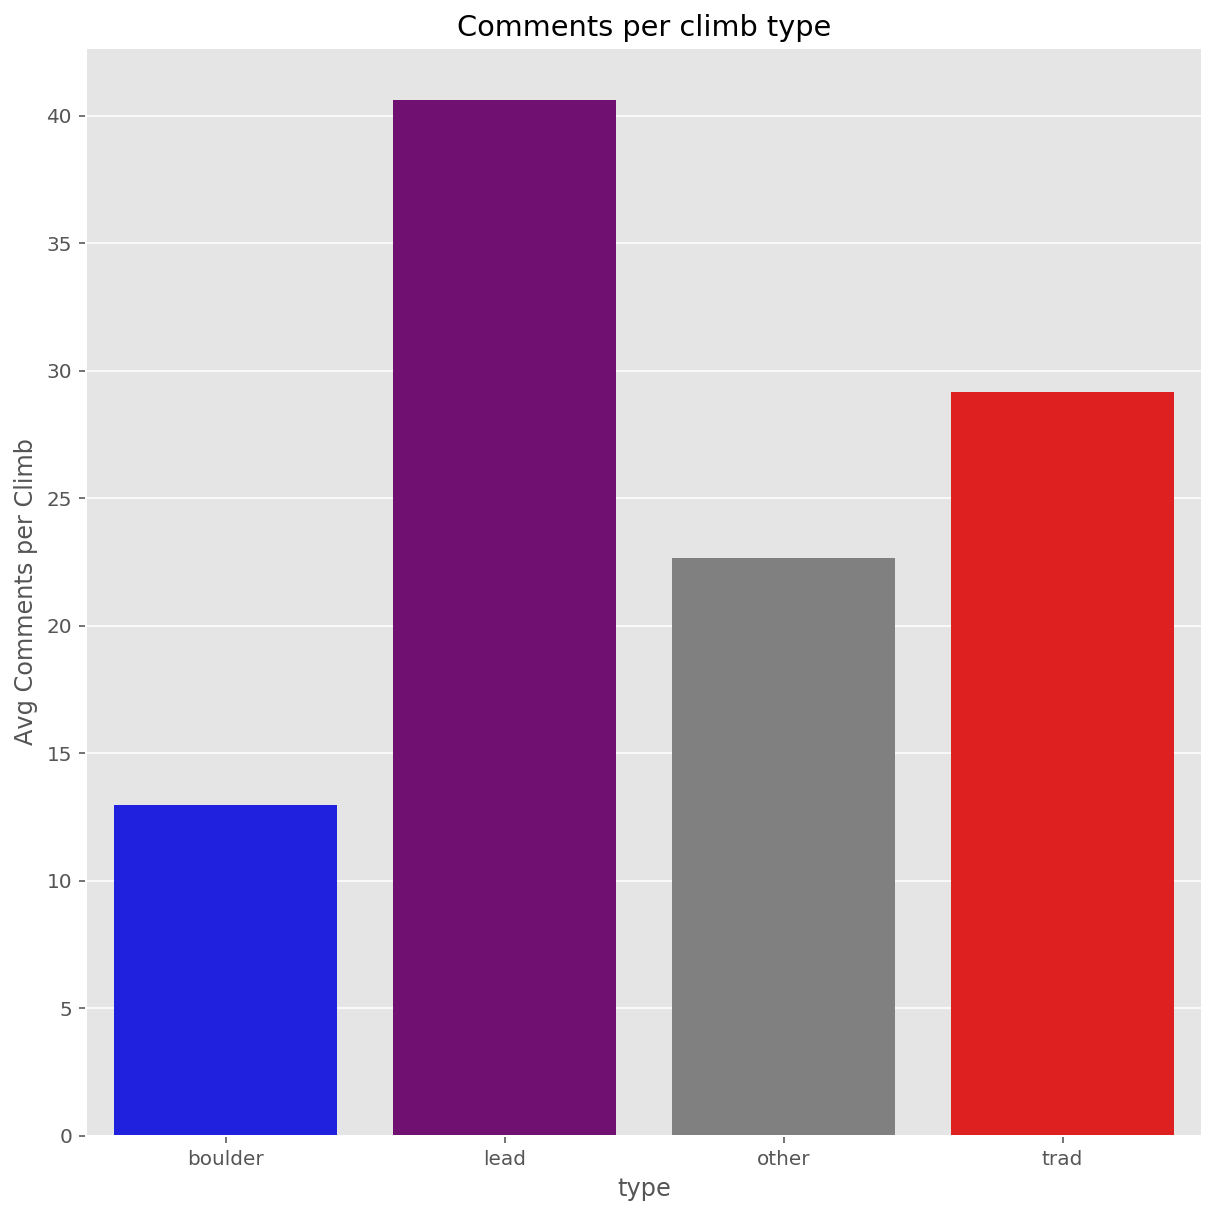

In [19]:
fig,ax = plt.subplots(figsize=(10,10))
to_plot = (df_climbs_uk.groupby('type').num_comments.sum()/df_climbs_uk.groupby('type').num_comments.count())
sns.barplot(x=to_plot.index,y=to_plot.values,palette=['blue','purple','grey','red']);
ax.set_title('Comments per climb type')
ax.set_ylabel('Avg Comments per Climb')
fig.savefig('comments_per_type_plot.png')

In [20]:
df_climbs_uk = df_climbs_uk.drop(435643)

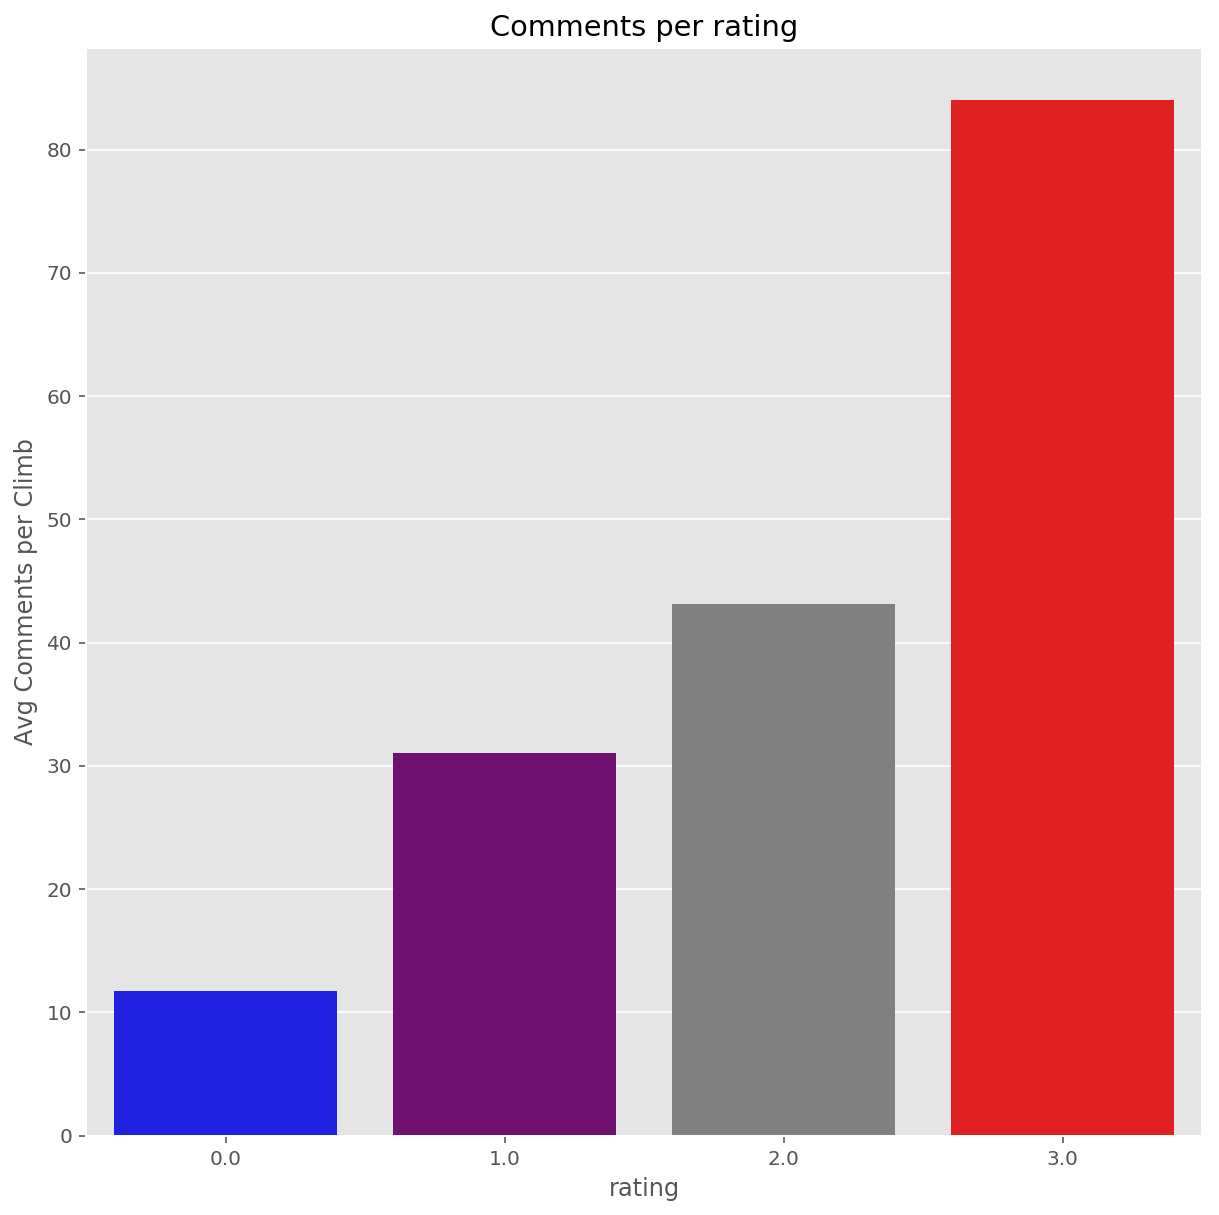

In [26]:
fig,ax = plt.subplots(figsize=(10,10))
to_plot = (df_climbs_uk.groupby('rating').num_comments.sum()/df_climbs_uk.groupby('rating').num_comments.count())
sns.barplot(x=to_plot.index,y=to_plot.values,palette=['blue','purple','grey','red']);
ax.set_title('Comments per rating')
ax.set_ylabel('Avg Comments per Climb')
fig.savefig('comments_per_rating_plot.png')

In [28]:
df_crags.climbs.max()

1586

In [ ]:
from sklearn.manifold import TSNE